In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Select relevant features for segmentation
features = data.iloc[:, 3:]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


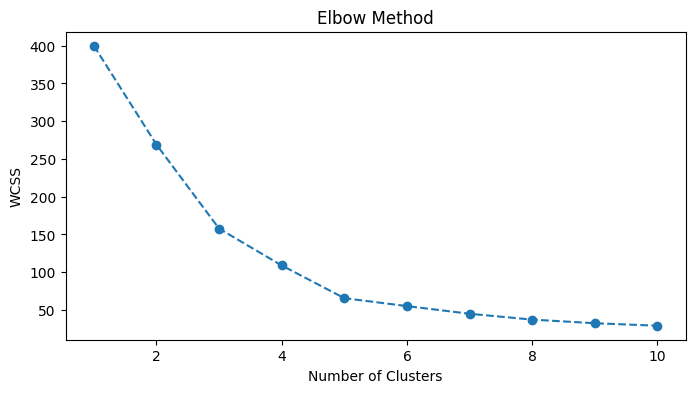

In [4]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


In [5]:
# Perform K-means clustering with the chosen number of clusters
k = 5  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
data['Cluster'] = clusters


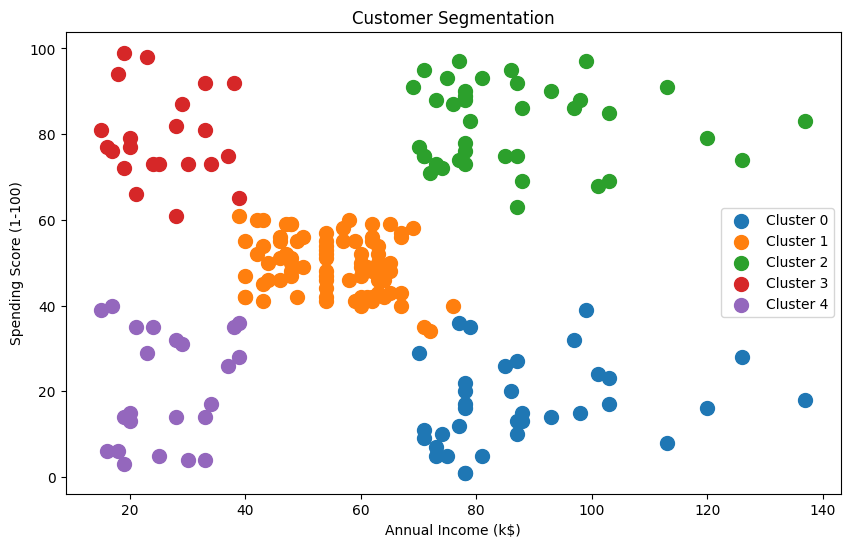

In [6]:
# Visualize the clusters based on two features (e.g., Annual Income vs. Spending Score)
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(data[data['Cluster'] == i]['Annual Income (k$)'],
                data[data['Cluster'] == i]['Spending Score (1-100)'],
                label=f'Cluster {i}', s=100)

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [7]:
# Calculate the mean values of numeric features for each cluster
numeric_cluster_means = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Print cluster characteristics
print(numeric_cluster_means)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        41.114286           88.200000               17.114286
1        42.716049           55.296296               49.518519
2        32.692308           86.538462               82.128205
3        25.272727           25.727273               79.363636
4        45.217391           26.304348               20.913043


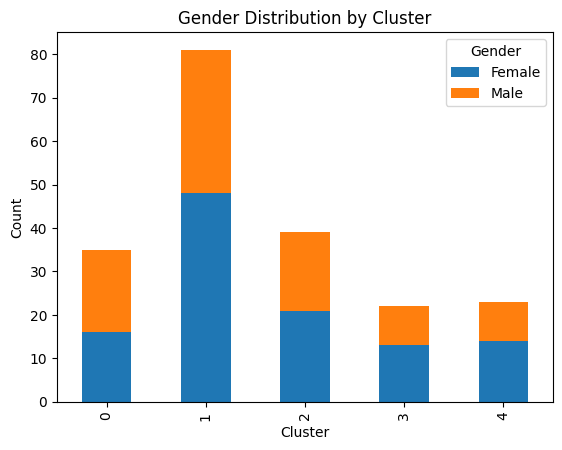

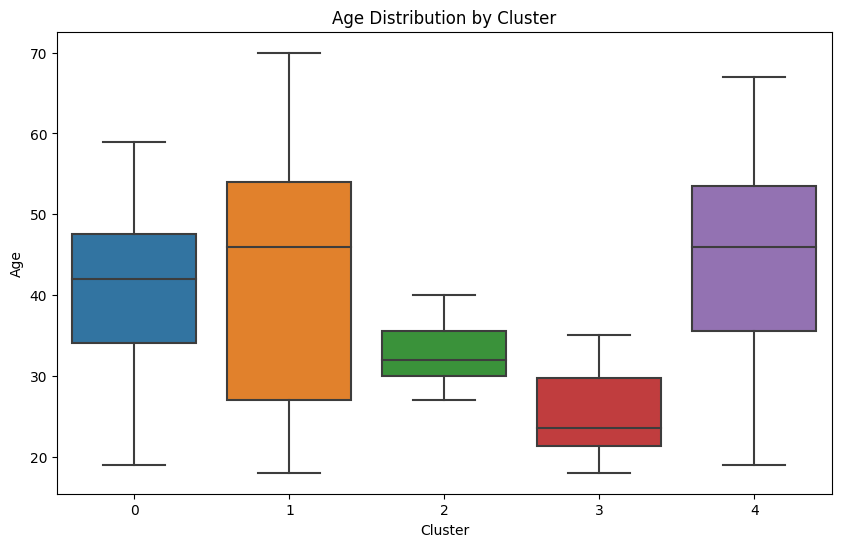

In [8]:
# Visualize gender distribution in each cluster
gender_counts = data.groupby(['Cluster', 'Gender']).size().unstack()
gender_counts.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Visualize age distribution by cluster using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=data)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()
